In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
df_train_final = pd.read_csv('../datasets/train.csv')
df_test_final = pd.read_csv('../datasets/test.csv')

In [59]:
df_train_final

,Unnamed: 0,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,...,Time,Winner/tie,PtsW,PtsL,YdsW,TOW,YdsL,TOL,Winner,WinningTeam
0,0,2018090905,2018-09-09,3,8,15,NE,HOU,1,10,...,1:00PM,NE,27,20,389,3,325,2,True,NE
1,1,2018090905,2018-09-09,4,5,58,NE,HOU,3,13,...,1:00PM,NE,27,20,389,3,325,2,True,NE
2,2,2018090905,2018-09-09,4,5,27,NE,HOU,4,2,...,1:00PM,NE,27,20,389,3,325,2,True,NE
3,3,2018090905,2018-09-09,4,5,17,HOU,NE,1,10,...,1:00PM,NE,27,20,389,3,325,2,False,NE
4,4,2018090905,2018-09-09,4,5,13,HOU,NE,2,10,...,1:00PM,NE,27,20,389,3,325,2,False,NE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39103,39103,2022121801,2022-12-18,1,2,39,PHI,CHI,1,10,...,1:00PM,KC,30,24,502,2,219,1,False,KC
39104,39104,2022121802,2022-12-18,1,1,1,HOU,KC,0,0,...,1:00PM,PHI,25,20,421,3,248,1,False,PHI
39105,39105,2022121802,2022-12-18,1,1,1,HOU,KC,0,0,...,1:00PM,KC,30,24,502,2,219,1,False,KC
39106,39106,2022121801,2022-12-18,4,15,0,PHI,CHI,1,10,...,1:00PM,PHI,25,20,421,3,248,1,True,PHI


In [60]:
print(df_train_final['WinningTeam'].unique())

['NE' 'LA' 'JAX' 'DET' 'NO' 'TEN' 'MIA' 'CHI' 'PHI' 'PIT' 'KC' 'SF' 'IND'
 'HOU' 'GB' 'SEA' 'BAL' 'ATL' 'TB' 'LV' 'LAC' 'CIN' 'ARI' 'NYJ' 'CLE'
 'BUF' nan]


In [61]:
df_test_final

,Unnamed: 0,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,...,Time,Winner/tie,PtsW,PtsL,YdsW,TOW,YdsL,TOL,Winner,WinningTeam
0,0,2023090700,2023-09-07,3,12,54,KC,DET,0,0,...,8:20PM,DET,21,20,368,1,316,1,False,DET
1,1,2023090700,2023-09-07,1,12,56,KC,DET,3,2,...,8:20PM,DET,21,20,368,1,316,1,False,DET
2,2,2023090700,2023-09-07,1,12,20,KC,DET,1,10,...,8:20PM,DET,21,20,368,1,316,1,False,DET
3,3,2023090700,2023-09-07,1,11,44,KC,DET,2,5,...,8:20PM,DET,21,20,368,1,316,1,False,DET
4,4,2023090700,2023-09-07,1,11,35,KC,DET,3,5,...,8:20PM,DET,21,20,368,1,316,1,False,DET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,6960,2023121009,2023-12-10,2,1,52,KC,BUF,2,8,...,4:05PM,SF,28,16,527,2,324,2,False,SF
6961,6961,2023121009,2023-12-10,3,7,10,KC,BUF,1,10,...,4:25PM,BUF,20,17,327,1,346,2,False,BUF
6962,6962,2023121009,2023-12-10,3,7,10,KC,BUF,1,10,...,4:05PM,SF,28,16,527,2,324,2,False,SF
6963,6963,2023121009,2023-12-10,4,0,25,BUF,KC,2,11,...,4:25PM,BUF,20,17,327,1,346,2,True,BUF


In [62]:
print(df_test_final['WinningTeam'].unique())

['DET' 'SF' 'KC' 'CLE' 'MIN' 'CIN' 'DEN' 'PHI' 'GB' 'BUF']


In [63]:
df_train_final['PenaltyOnWinner'] = df_train_final.apply(lambda row: row['Winner/tie'] == row['PenaltyTeam'], axis = 1)
df_test_final['PenaltyOnWinner'] = df_test_final.apply(lambda row: row['Winner/tie'] == row['PenaltyTeam'], axis = 1)

In [64]:
feature_list_pca = ['Down','ToGo','YardLine','SeriesFirstDown','Yards','IsRush','IsPass','IsIncomplete','IsTouchdown','IsSack','IsChallenge','IsChallengeReversed','IsInterception','IsFumble','IsPenalty','IsTwoPointConversion','IsTwoPointConversionSuccessful','IsPenaltyAccepted','PenaltyOnWinner', 'Winner']
X_train_pca = df_train_final[feature_list_pca]
y_train_pca = df_train_final['Winner']
X_test = df_test_final[feature_list_pca]
y_test = df_test_final['Winner']

# pca


In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [66]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train_pca)
X_test_scaled = ss.transform(X_test)

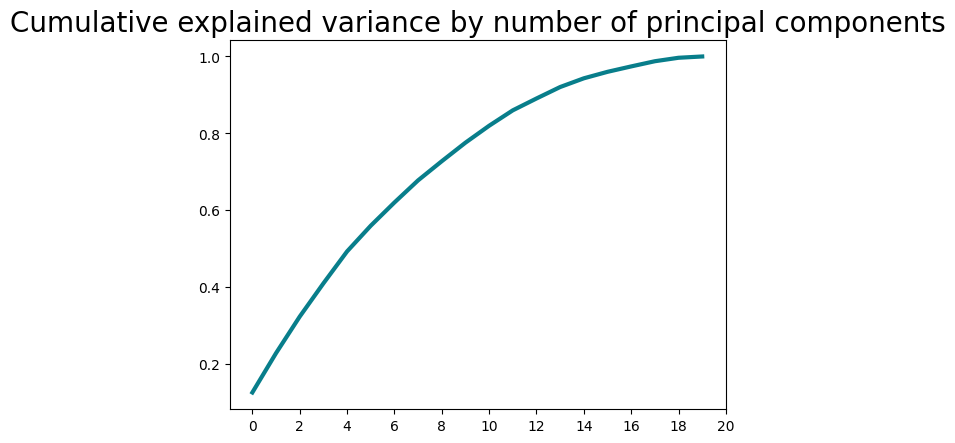

In [67]:
pca = PCA(n_components=len(feature_list_pca)).fit(X_train_scaled)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=20)
plt.xticks(range(0,21,2))
plt.show()

In [68]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_),
    columns=[f'PC{i}' for i in range(1, len(X_train_pca.columns) + 1)],
    index=X_train_pca.columns
)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
Down,0.238224,-0.226419,-0.138823,0.008474,0.046361,-0.081445,0.265968,0.465196,0.064464,-0.004393,-0.625727,0.413868,0.058802,0.005398,0.039917,-0.020090,0.026914,-0.056625,-0.018030,-0.001033
ToGo,0.265922,-0.328274,-0.339324,-0.017166,-0.062999,0.551882,0.203863,0.325748,-0.173332,-0.100069,0.168002,-0.263961,-0.167880,0.020147,-0.091678,-0.019221,0.074537,-0.262662,0.001831,0.004945
YardLine,-0.074519,0.142972,0.255555,0.123608,0.002516,-0.551927,-0.135116,0.526569,0.069724,0.066180,0.171342,-0.038898,-0.495182,0.064902,0.050060,-0.011550,-0.009608,-0.028304,0.014823,0.000925
SeriesFirstDown,-0.532951,-0.021089,0.591153,-0.263106,0.022710,-0.130531,0.060229,-0.330130,0.013803,-0.070664,-0.120614,0.033971,-0.018627,0.028427,0.133507,-0.039148,0.078658,-0.329749,-0.101464,0.008652
Yards,-0.210477,-0.327495,0.501461,-0.450193,-0.044174,0.394354,0.203328,0.083971,-0.093774,-0.130552,-0.014917,0.018796,-0.148150,0.004073,0.280416,0.001922,-0.028515,0.170790,0.177342,-0.005365


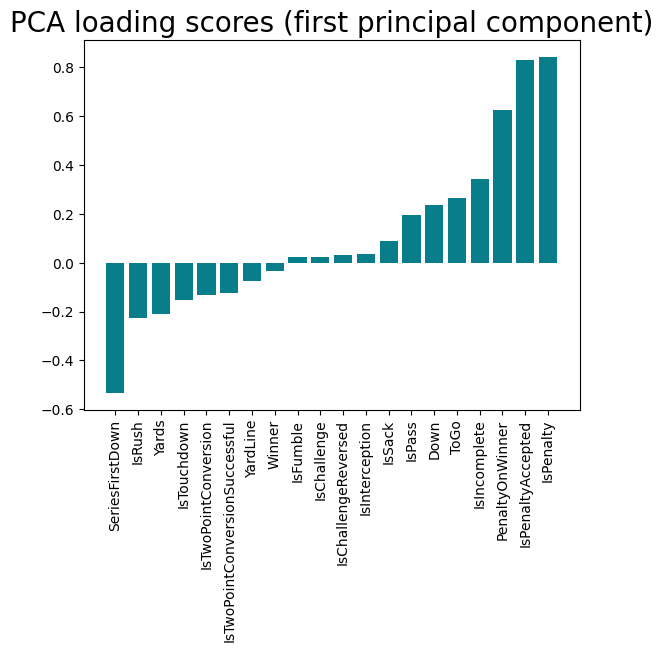

In [69]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=True)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()

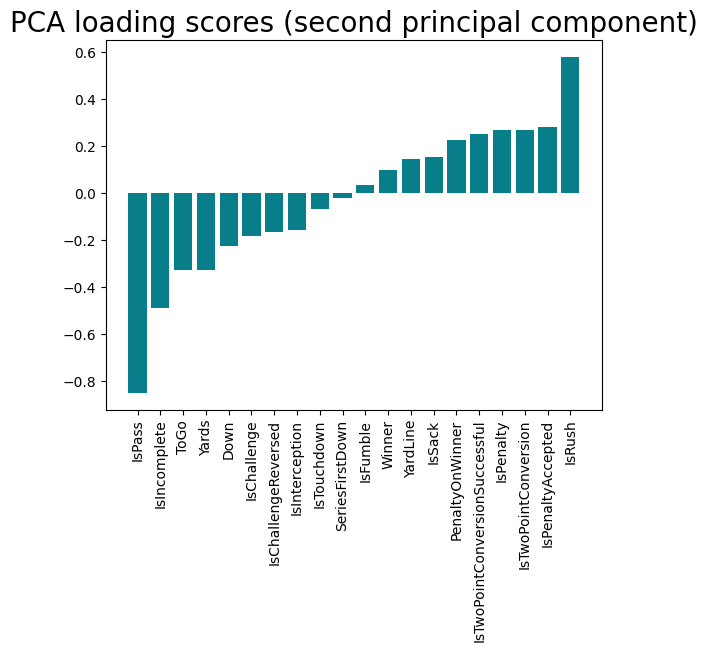

In [70]:
pc2_loadings = loadings.sort_values(by='PC2', ascending=True)[['PC2']]
pc2_loadings = pc2_loadings.reset_index()
pc2_loadings.columns = ['Attribute', 'CorrelationWithPC2']

plt.bar(x=pc2_loadings['Attribute'], height=pc2_loadings['CorrelationWithPC2'], color='#087E8B')
plt.title('PCA loading scores (second principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [71]:
loading_abscumsum = loadings.apply(lambda row: sum(abs(row)), axis = 1).sort_values(ascending=True)
loading_abscumsum

IsChallengeReversed               2.003700
IsChallenge                       2.004721
Winner                            2.225260
IsPenalty                         2.294103
PenaltyOnWinner                   2.295291
IsInterception                    2.382368
IsPenaltyAccepted                 2.391635
IsPass                            2.436946
IsTwoPointConversion              2.606503
IsTwoPointConversionSuccessful    2.709954
IsFumble                          2.728261
Down                              2.806171
YardLine                          2.834281
SeriesFirstDown                   2.929185
IsSack                            3.063781
IsTouchdown                       3.206191
Yards                             3.290063
IsIncomplete                      3.307016
IsRush                            3.367280
ToGo                              3.443446
dtype: float64

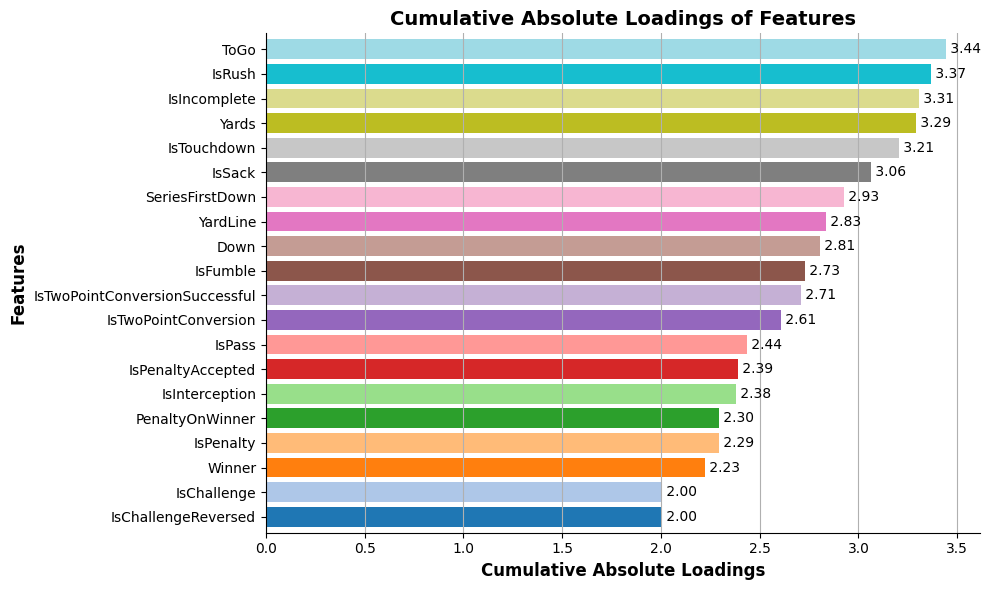

In [72]:
# Choose a color palette
colors = plt.cm.tab20.colors

# Generate the bar plot with custom colors and bar width
ax = loading_abscumsum.plot.barh(color=colors, width=0.8)

# Set labels and title with bold font
ax.set_xlabel('Cumulative Absolute Loadings', fontweight='bold', fontsize=12)
ax.set_ylabel('Features', fontweight='bold', fontsize=12)
ax.set_title('Cumulative Absolute Loadings of Features', fontweight='bold',fontsize=14)

# Add grid lines
ax.grid(axis='x')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add data labels to the bars
for i, value in enumerate(loading_abscumsum):
    ax.text(value, i, f' {value:.2f}', va='center', fontsize=10)

# Adjust figure size and layout
plt.gcf().set_size_inches(10, 6)
plt.tight_layout()

# Show the plot
plt.show()

In [73]:
feature_list_dtc1 = loading_abscumsum[loading_abscumsum > loading_abscumsum.quantile(q=0.5)].index.to_list()
feature_list_dtc1

['IsFumble',
 'Down',
 'YardLine',
 'SeriesFirstDown',
 'IsSack',
 'IsTouchdown',
 'Yards',
 'IsIncomplete',
 'IsRush',
 'ToGo']

# dtc

Decision Tree Classification with top 50% of loadings' absolute cumulative sum

In [74]:
plt.show()
feature_list_dtc1 = loading_abscumsum[loading_abscumsum > loading_abscumsum.quantile(q=0.5)].index.to_list()
feature_list_dtc1

['IsFumble',
 'Down',
 'YardLine',
 'SeriesFirstDown',
 'IsSack',
 'IsTouchdown',
 'Yards',
 'IsIncomplete',
 'IsRush',
 'ToGo']

In [75]:
from sklearn.tree import DecisionTreeClassifier as dtc
# from sklearn.model_selection import train_test_split as tts
from sklearn import tree
from sklearn.metrics import accuracy_score

In [76]:
X_train_dtc = df_train_final[feature_list_dtc1]
y_train_dtc = df_train_final['Winner']
X_test_dtc = df_test_final[feature_list_dtc1]
y_test_dtc = df_test_final['Winner']

In [77]:
clf = dtc(criterion='entropy')
clf.fit(X_train_dtc,y_train_dtc)

DecisionTreeClassifier(criterion='entropy')

In [78]:
pred1 = clf.predict(X_test_dtc)
accuracy = accuracy_score(pred1, y_test_dtc)
accuracy

0.5827709978463748

Decision Tree Classification with top 25% of loadings' absolute cumulative sum

In [79]:
feature_list_dtc2 = loading_abscumsum[loading_abscumsum > loading_abscumsum.quantile(q=0.75)].index.to_list()
feature_list_dtc2

['IsTouchdown', 'Yards', 'IsIncomplete', 'IsRush', 'ToGo']

In [80]:
X_train_dtc2 = df_train_final[feature_list_dtc2]
y_train_dtc2 = df_train_final['Winner']
X_test_dtc2 = df_test_final[feature_list_dtc2]
y_test_dtc2 = df_test_final['Winner']

In [81]:
clf = dtc(criterion='entropy')
clf.fit(X_train_dtc2,y_train_dtc2)

DecisionTreeClassifier(criterion='entropy')

In [82]:
pred2 = clf.predict(X_test_dtc2)
accuracy = accuracy_score(pred2, y_test_dtc2)
accuracy

0.6419239052404881